In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [64]:

# Read the dataset
df = pd.read_csv("weather.csv")

# Replace text values in 'Precip Type' column with numerical values
df['Precip Type'].replace({'rain': 1, 'snow': 0}, inplace=True)

# Fill missing values in 'Temperature (C)' column with mean temperature
mean_temperature = df['Temperature (C)'].mean()
df['Temperature (C)'].fillna(mean_temperature, inplace=True)

# Tokenize and convert text into numerical vectors for 'Daily Summary' column
vectorizer = CountVectorizer()
X_summary = vectorizer.fit_transform(df['Daily Summary'])

# Convert feature names to strings
df.columns = df.columns.astype(str)

# Concatenate the numerical features with the 'X_summary' matrix
selected_columns = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                    'Pressure (millibars)', 'Loud Cover', 'Visibility (km)', 
                    'Apparent Temperature (C)']
x_numerical = df[selected_columns]

# Convert the matrix to a DataFrame with appropriate column names
x_summary_df = pd.DataFrame(X_summary.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the numerical features with the summary features
x = pd.concat([x_numerical, x_summary_df], axis=1)

# Select target variables
y = df[['Temperature (C)', 'Precip Type']]

C:\Users\kd02\AppData\Local\Temp\ipykernel_5124\1231150867.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].replace({'rain': 1, 'snow': 0}, inplace=True)
C:\Users\kd02\AppData\Local\Temp\ipykernel_5124\1231150867.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Precip Typ

In [78]:
df.dropna(subset=['Temperature (C)', 'Precip Type'], inplace=True)

# Select target variables
y = df[['Temperature (C)', 'Precip Type']]

# Ensure that x and y have the same indices
x = x.loc[y.index]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = linear.predict(x_test)

In [68]:
y_pred

array([[16.61621578,  1.05169328],
       [24.83568119,  0.98517092],
       [11.04640235,  0.81191137],
       ...,
       [ 6.97961614,  0.98026698],
       [17.06881427,  0.90436444],
       [19.46946394,  0.99512182]])

In [69]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4777314263010399


Mean Squared Error: 0.4777314263010399
Root Mean Squared Error: 0.6911811819639189
Mean Absolute Error: 0.4630441280857033


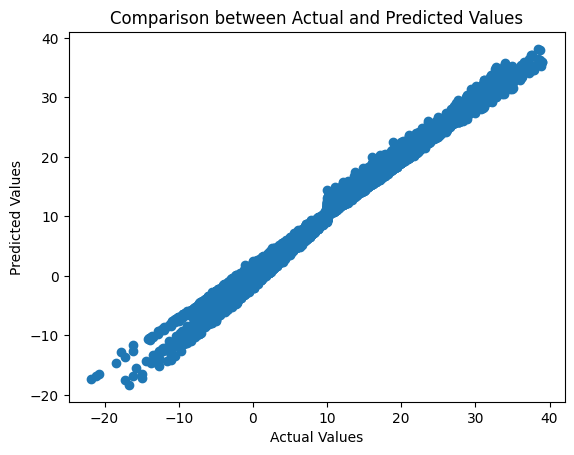

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison between Actual and Predicted Values")
plt.show()

In [73]:
df.columns.tolist()

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [74]:
df['Summary']

0        Partly Cloudy
1        Partly Cloudy
2        Mostly Cloudy
3        Partly Cloudy
4        Mostly Cloudy
             ...      
96448    Partly Cloudy
96449    Partly Cloudy
96450    Partly Cloudy
96451    Partly Cloudy
96452    Partly Cloudy
Name: Summary, Length: 95936, dtype: object